In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ETL import ETL
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('dataset/2012.csv')

In [3]:
df = ETL(df)

c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_MON'] = df['FL_DATE'].apply(lambda x: x.month)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_DAY'] = df['FL_DATE'].apply(lambda x: x.day)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

# PCA

In [6]:
df.columns

Index(['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FL_MON', 'FL_DAY', 'FL_YEAR',
       'FL_DOW', 'CANCELLATION_REASON', 'IS_HOLIDAY'],
      dtype='object')

In [4]:
data = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)][[
    'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
    'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
    'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
    'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
]].fillna(0)


In [5]:
# Standardizzazione dei dati
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

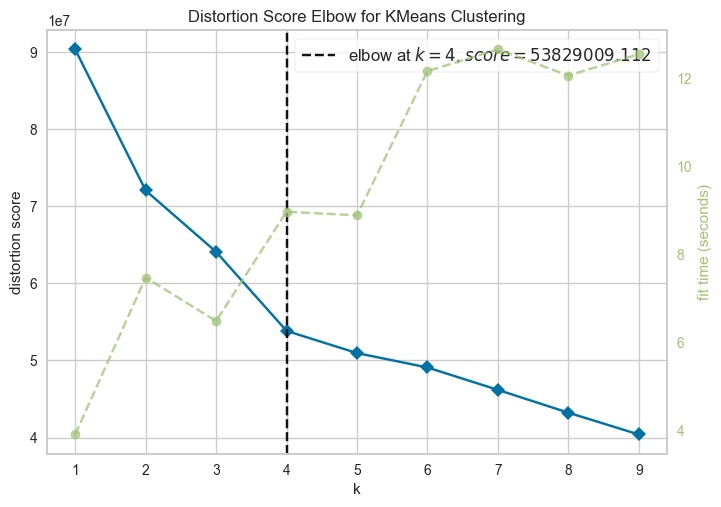

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Creazione del modello KMeans
model = KMeans(random_state=42)

# Utilizzo di KElbowVisualizer per determinare il numero ottimale di cluster
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=True)

# Fit dei dati e visualizzazione del grafico
visualizer.fit(data_scaled)
visualizer.show()

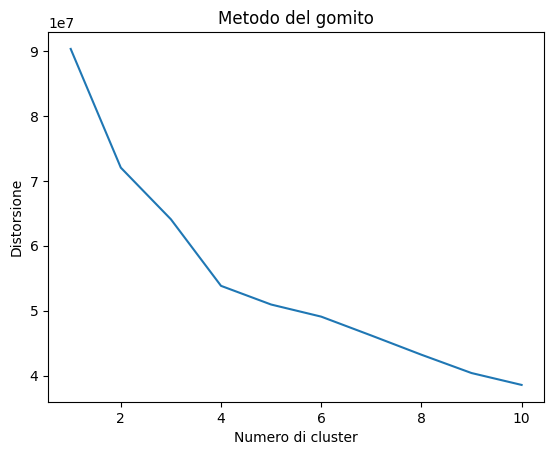

In [12]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions)
plt.xlabel('Numero di cluster')
plt.ylabel('Distorsione')
plt.title('Metodo del gomito')
plt.show()

In [6]:
pca = PCA(n_components=2)  # Sostituisci 2 con il numero di componenti che vuoi
pca_result = pca.fit_transform(data_scaled)

In [7]:
# Applica K-Means ai risultati della PCA
kmeans = KMeans(n_clusters=4, random_state=0)  # Imposta n_clusters al numero desiderato
kmeans.fit(pca_result)
clusters = kmeans.predict(pca_result)

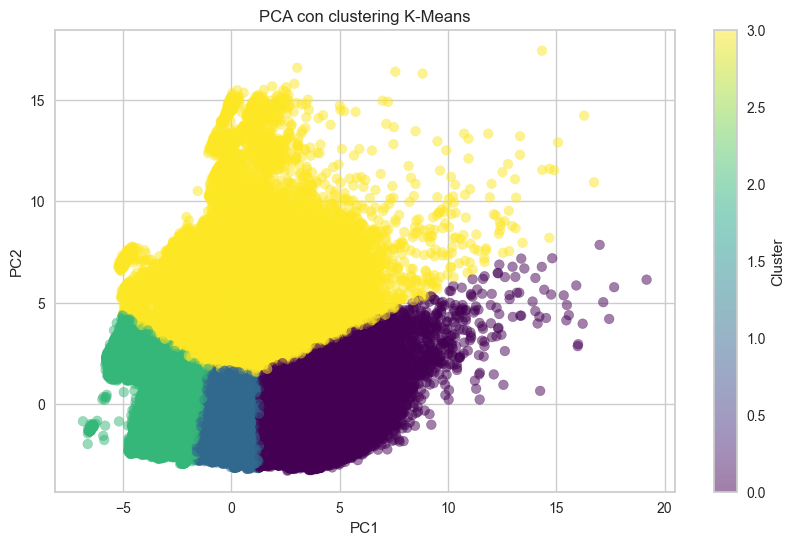

In [18]:
# Visualizza il grafico della PCA con i cluster di K-Means
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA con clustering K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [24]:
# Calcola i campioni di silhouette per ciascun punto
silhouette_vals = silhouette_samples(pca_result, clusters)

# Calcola la silhouette media per l'intero clustering
silhouette_avg = silhouette_score(pca_result, clusters)

# Visualizza il grafico della silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
n_clusters = len(set(clusters))

for i in range(n_clusters):
    # Accumula i valori di silhouette del cluster i e ordina i valori
    ith_cluster_silhouette_vals = silhouette_vals[clusters == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(ith_cluster_silhouette_vals)
    color = plt.cm.viridis(i / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Etichetta ogni silhouette con il rispettivo cluster al centro del grafico
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), str(i))
    
    # Aggiorna y_lower per il prossimo cluster
    y_lower = y_upper + 10

# Linea verticale per la silhouette media dell'intero clustering
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.xlabel("Valore della silhouette")
plt.ylabel("Cluster")
plt.title("Grafico della silhouette per il clustering di K-Means")
plt.show()

: 

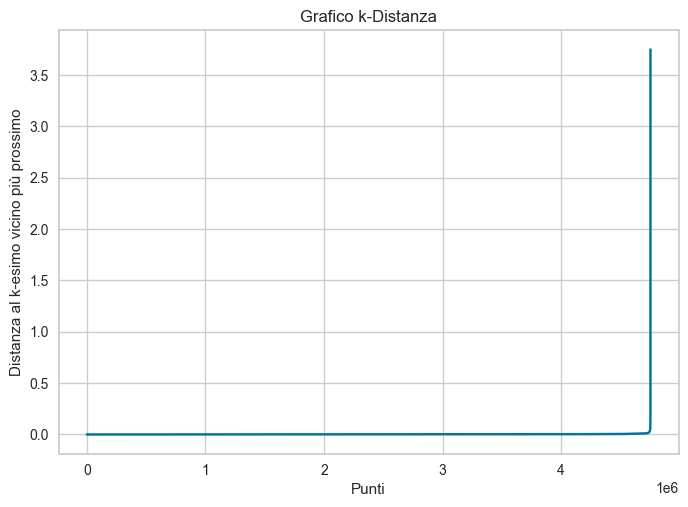

In [10]:
# Usa i dati PCA ridotti
pca_result = pca.fit_transform(data_scaled)

# Calcola le distanze dai vicini più prossimi
k = 2 # Imposta 'k' uguale a min_samples.+-
neigh = NearestNeighbors(n_neighbors=k)
neighbors = neigh.fit(pca_result)
distances, indices = neighbors.kneighbors(pca_result)

# Calcola la distanza dal k-esimo vicino più prossimo
distances = np.sort(distances[:, -1], axis=0)

# Traccia il grafico
plt.plot(distances)
plt.xlabel('Punti')
plt.ylabel('Distanza al k-esimo vicino più prossimo')
plt.title('Grafico k-Distanza')
plt.show()


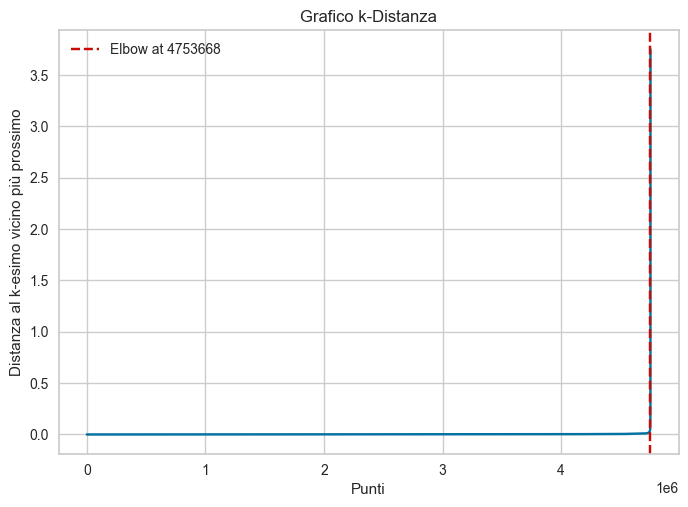

Valore suggerito di epsilon: 2.19282081536878


In [ ]:
# Calcola la differenza tra le distanze successive
dist_diff = np.diff(distances)

# Trova il punto di "gomito" dove la differenza cambia più rapidamente
elbow_index = np.argmax(dist_diff)

# Traccia il grafico delle distanze
plt.plot(distances)

# Aggiungi una linea verticale per evidenziare il punto di gomito
plt.axvline(x=elbow_index, color='r', linestyle='--', label=f'Elbow at {elbow_index}')

# Riduci la densità dei tick sull'asse x
plt.xticks(np.arange(0, len(distances), step=5000))  # Cambia il valore di step per mostrare più o meno tick

plt.xlabel('Punti')
plt.ylabel('Distanza al k-esimo vicino più prossimo')
plt.title('Grafico k-Distanza')
plt.legend()
plt.show()

# Il punto di gomito può essere un buon candidato per epsilon
epsilon = distances[elbow_index]
print(f"Valore suggerito di epsilon: {epsilon}")

In [ ]:
# Esegui DBSCAN sui risultati della PCA
dbscan = DBSCAN(eps=epsilon, min_samples=k)  # Imposta eps e min_samples in base ai tuoi dati
dbscan_labels = dbscan.fit_predict(pca_result)